## ANALYSING DATA SCIENCE JOB MARKET 
This project is to help job seekers better understand data-driven job market in the UK. 

The dataset included 595 data-driven jobs around the UK from Reed Job board which were posted from late December 2020 to early February 2021. SpecialThe dataset was shared by 
https://www.kaggle.com/devario/uk-data-science-jobs-dataset  

Information scraped are Job Title, Date Posted, Date Ending, Advertiser, Location, City, Salary, Salary Min, Salary Max, Description. 


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.options.display.max_colwidth = 400


In [5]:
UKjobs=pd.read_csv(r'/Users/trinhthivyphuong/Documents/BA - Programming/BEMM458-main/data/deduped-jobs.csv')


In [447]:
UKjobs.head(1)

,reference,title,date_posted,date_ending,advertiser,location,city,country,salary,salary_min,...,Data_Science,Machine_Learning,Visualization,Research,Hadoop,Communication,Java,Scala,Big_Data,One_year
0,41715769,Senior Customer Insight Analytics Manager,11/01/2021,2021-02-22T23:55:00.0000000,Harnham,Lancashire,Manchester,GB,10000,10000,...,Data_Science,No,No,No,No,No,No,No,No,


In [7]:
UKjobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reference         595 non-null    int64  
 1   title             595 non-null    object 
 2   date_posted       595 non-null    object 
 3   date_ending       595 non-null    object 
 4   advertiser        595 non-null    object 
 5   location          595 non-null    object 
 6   city              595 non-null    object 
 7   country           595 non-null    object 
 8   salary            595 non-null    int64  
 9   salary_min        595 non-null    int64  
 10  salary_max        595 non-null    int64  
 11  salary_frequency  595 non-null    object 
 12  salary_currency   0 non-null      float64
 13  description       595 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 65.2+ KB


In [8]:
UKjobs[['salary','salary_min','salary_max']].describe()

,salary,salary_min,salary_max
count,595.000000,595.000000,595.000000
mean,57189.033613,57189.033613,72737.552941
std,21715.541218,21715.541218,37923.735008
min,10000.000000,10000.000000,18000.000000
25%,41000.000000,41000.000000,55000.000000
50%,55000.000000,55000.000000,70000.000000
75%,70000.000000,70000.000000,85000.000000
max,150000.000000,150000.000000,750000.000000


## 1. Job Level

### 1.1 Analytical Level

In [9]:
DSAA='Data Scientist|Economist|Data Engineer|Biostatistician|Statistician|Financial Quantitative Analyst|Architect|Scientist|Engineer'

filterDSAA = UKjobs['title'].str.contains(DSAA)

UKjobs['Analytical Level']=UKjobs['title'].str.contains(DSAA)
#convert a boolean to a string
mask = UKjobs.applymap(type) != bool
d = {True: 'DSAA', False: 'Non_DSAA'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))
UKjobs.groupby('Analytical Level')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Analytical Level,,,,,,,,
DSAA,325.0,59734.443077,19024.876337,22000.0,45000.0,60000.0,70000.0,150000.0
Non_DSAA,270.0,54125.114815,24250.750939,10000.0,40000.0,50000.0,65000.0,150000.0


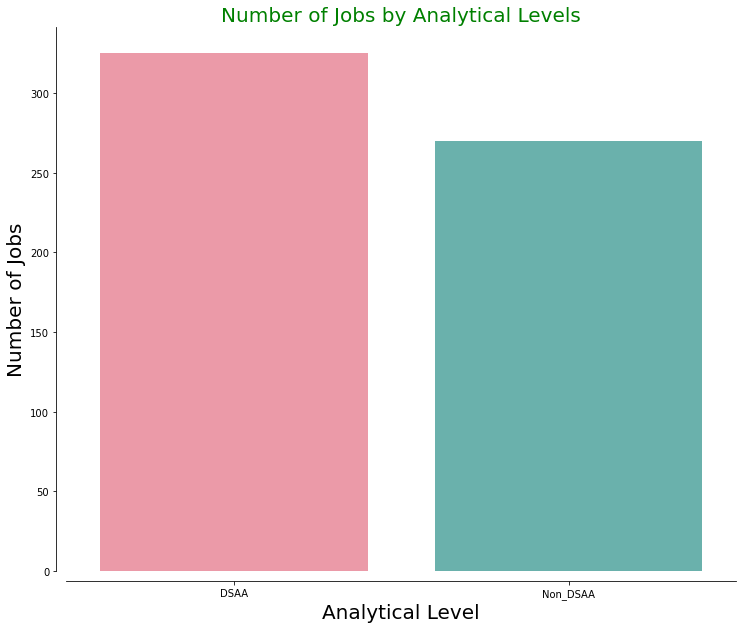

In [458]:
Analytical_count  = UKjobs['Analytical Level'].value_counts()
plt.figure(figsize=(12,10))
sns.barplot(Analytical_count.index, Analytical_count.values, alpha=0.8,palette='husl')
plt.title('Number of Jobs by Analytical Levels', fontsize=20, color='Green')
plt.ylabel('Number of Jobs', fontsize=20)
plt.xlabel('Analytical Level', fontsize=20)

sns.despine(offset=10)
plt.savefig('Figure/Number of Jobs by Analytical Levels.jpg')

plt.show()

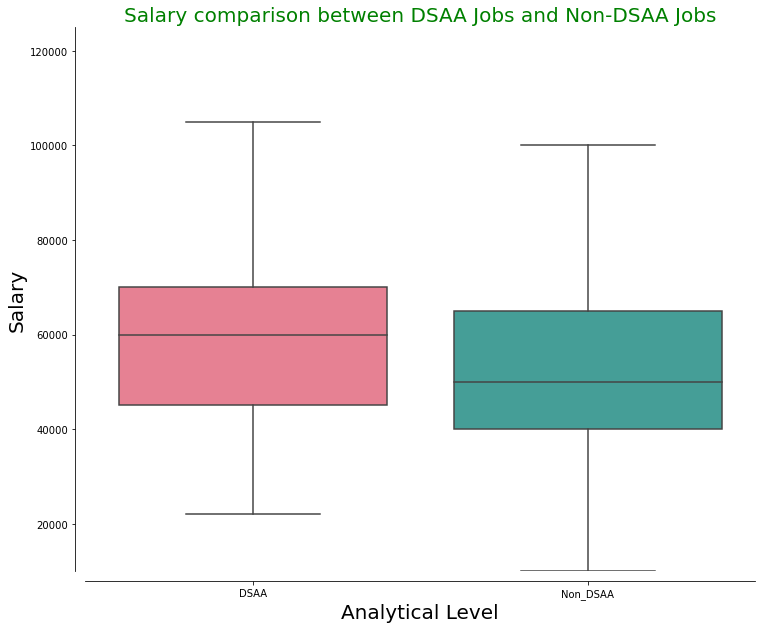

In [457]:
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.boxplot(
    x='Analytical Level',
    y='salary',
    data=UKjobs,
    fliersize=0,
    palette='husl',order=['DSAA','Non_DSAA'],
    ax=ax)

ax.set_ylim([10000, 125000])
ax.set_ylabel("Salary", fontsize=20)
ax.set_xlabel("Analytical Level", fontsize=20)
ax.set_title("Salary comparison between DSAA Jobs and Non-DSAA Jobs", fontsize=20, color='Green')

sns.despine(offset=10)
plt.savefig('Figure/Salary comparison between DSAA Jobs and Non-DSAA Jobs.jpg')
plt.show()

### 1.2 Experience Level

In [17]:
# find graduate level 
Entry_Level='Graduate|Intern|Junior|Associate|Assistant|Executive|entry|Entry|generalist|graduate|intern|junior'
filterG = UKjobs['title'].str.contains(Entry_Level)
UKjobs['Entry_Level']=UKjobs['title'].str.contains(Entry_Level)


#convert a boolean to a string
mask = UKjobs.applymap(type) != bool
d = {True: 'Entry_Level', False: 'Non_Entry_Level'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby('Entry_Level')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Entry_Level,,,,,,,,
Entry_Level,15.0,27133.333333,6127.999751,18000.0,22500.0,27000.0,30000.0,40000.0
Non_Entry_Level,580.0,57966.336207,21421.145273,10000.0,45000.0,55000.0,70000.0,150000.0


In [18]:
Highly_Experienced='Manager|Senior|Lead|Director|Head|CTO|manager|director|lead|cto|head'

filterM = UKjobs['title'].str.contains(Highly_Experienced)
UKjobs[filterM].head(2)
UKjobs['Experienced_Level']=UKjobs['title'].str.contains(Highly_Experienced)


#convert a boolean to a string
mask = UKjobs.applymap(type) != bool
d = {True: 'Highly_Experienced', False: 'Non_Highly_Experienced'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))
UKjobs.groupby(['Experienced_Level'])['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Experienced_Level,,,,,,,,
Highly_Experienced,277.0,66356.389892,22644.399223,10000.0,50000.0,65000.0,80000.0,150000.0
Non_Highly_Experienced,318.0,49203.632075,17313.974693,18000.0,40000.0,45000.0,60000.0,125000.0


In [21]:
# classify 3 levels for each job
UKjobs.loc[(UKjobs['Entry_Level'] == 'Entry_Level') & (UKjobs['Experienced_Level'] != 'Highly_Experienced'), 'Experience Level'] = 'Entry' 
UKjobs.loc[(UKjobs['Entry_Level'] != 'Entry_Level') & (UKjobs['Experienced_Level'] == 'Highly_Experienced'), 'Experience Level'] = 'Senior or above'
UKjobs.loc[(UKjobs['Entry_Level'] != 'Entry_Level') & (UKjobs['Experienced_Level'] != 'Highly_Experienced'), 'Experience Level'] = 'Experienced'  


In [32]:
UKjobs.groupby(['Experience Level'])['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Experience Level,,,,,,,,
Entry,15.0,27133.333333,6127.999751,18000.0,22500.0,27000.0,30000.0,40000.0
Experienced,303.0,50296.221122,16956.738683,18000.0,40000.0,50000.0,60000.0,125000.0
Senior or above,277.0,66356.389892,22644.399223,10000.0,50000.0,65000.0,80000.0,150000.0


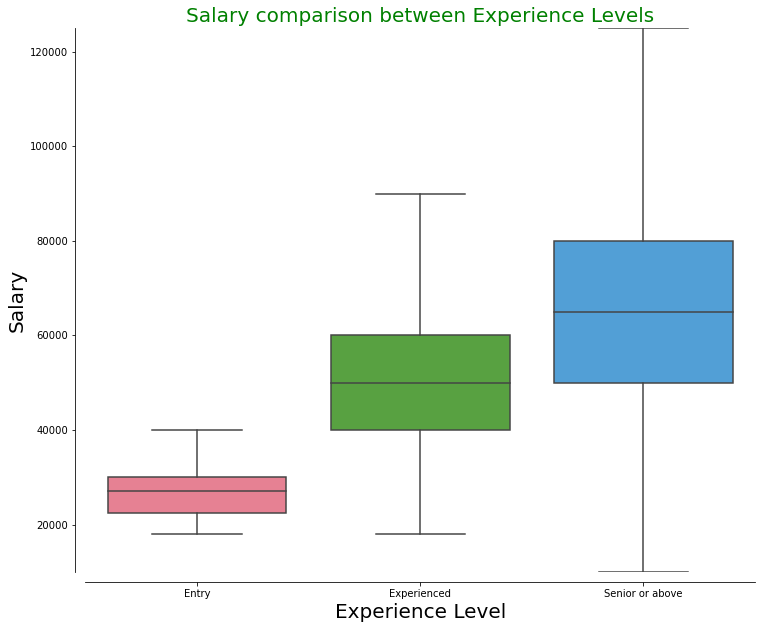

In [456]:
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.boxplot(
    x='Experience Level',
    y='salary',
    data=UKjobs,
    fliersize=0,
    palette='husl', order=['Entry','Experienced','Senior or above'],
    ax=ax)

ax.set_ylim([10000, 125000])
ax.set_ylabel("Salary", fontsize=20)
ax.set_xlabel("Experience Level", fontsize=20)
ax.set_title("Salary comparison between Experience Levels", fontsize=20, color='Green')

sns.despine(offset=10)
plt.savefig('Figure/Salary comparison between Experience Levels.jpg')
plt.show()

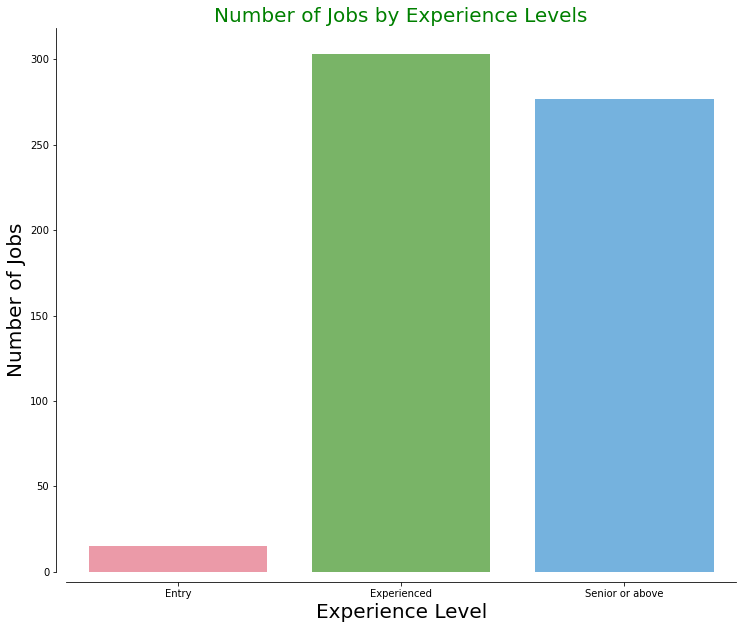

In [455]:
experience_count  = UKjobs['Experience Level'].value_counts()
plt.figure(figsize=(12,10))
sns.barplot(experience_count.index, experience_count.values, alpha=0.8,palette='husl',order=['Entry','Experienced','Senior or above'])
plt.title('Number of Jobs by Experience Levels', fontsize=20, color='Green')
plt.ylabel('Number of Jobs', fontsize=20)
plt.xlabel('Experience Level', fontsize=20)
sns.despine(offset=10)
plt.savefig('Figure/Number of jobs by Experience Levels.jpg')
plt.show()

### 1.3 Salary comparison between Analytical Level and Experience Level 

In [33]:
UKjobs.groupby(['Experience Level','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Experience Level Analytical Level                                               
Entry            DSAA                7.0  28714.285714   5707.138387  22000.0   
                 Non_DSAA            8.0  25750.000000   6519.202405  18000.0   
Experienced      DSAA              189.0  54816.878307  16932.978690  23000.0   
                 Non_DSAA          114.0  42801.447368  14162.107921  18000.0   
Senior or above  DSAA              129.0  68622.511628  18043.710132  38000.0   
                 Non_DSAA          148.0  64381.189189  25900.209844  10000.0   

                                       25%      50%      75%       max  
Experience Level Analytical Level                                       
Entry            DSAA              26000.0  27000.0  30000.0   40000.0  
                 Non_DSAA          20000.0  25500.0  29500.0   35000.0  
Experienced      DSAA              45000.0  50000.0  60000.0  125000.0  
                 Non_DSAA          35000.0  42500.0  50000.0  100000.0  
Senior or above  DSAA              55000.0  70000.0  80000.0  150000.0  
                 Non_DSAA          45000.0  60000.0  80000.0  150000.0

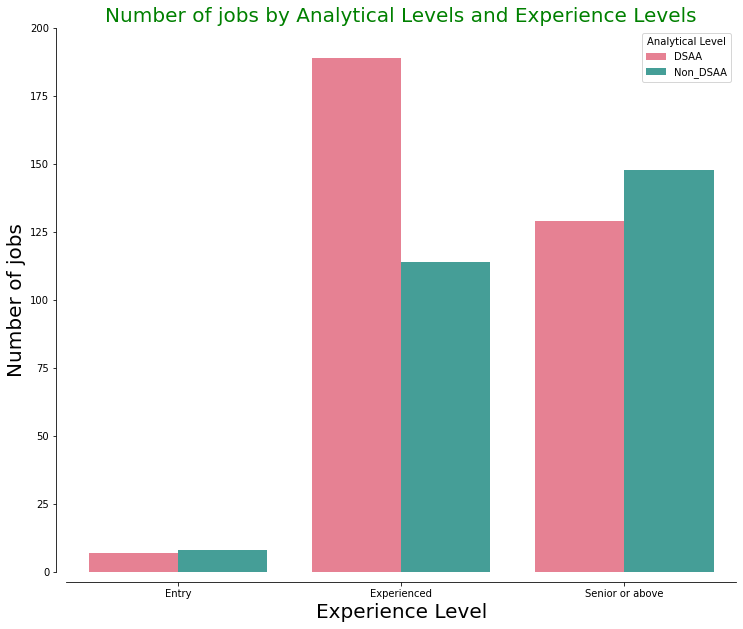

In [454]:
# plot number of jobs divided by Analytical Level 
fig, ax = plt.subplots(1, figsize=(12,10))
ax=sns.countplot(x="Experience Level",hue='Analytical Level', data=UKjobs,order=['Entry','Experienced','Senior or above'],hue_order=['DSAA','Non_DSAA'],palette='husl')
ax.set_ylim([0, 200])
ax.set_ylabel("Number of jobs", fontsize=20)
ax.set_xlabel("Experience Level", fontsize=20)
ax.set_title("Number of jobs by Analytical Levels and Experience Levels", fontsize=20, color='Green')
sns.despine(offset=10)
plt.savefig('Figure/Number of jobs by Analytical Levels and Experience Levels.jpg')
plt.show()

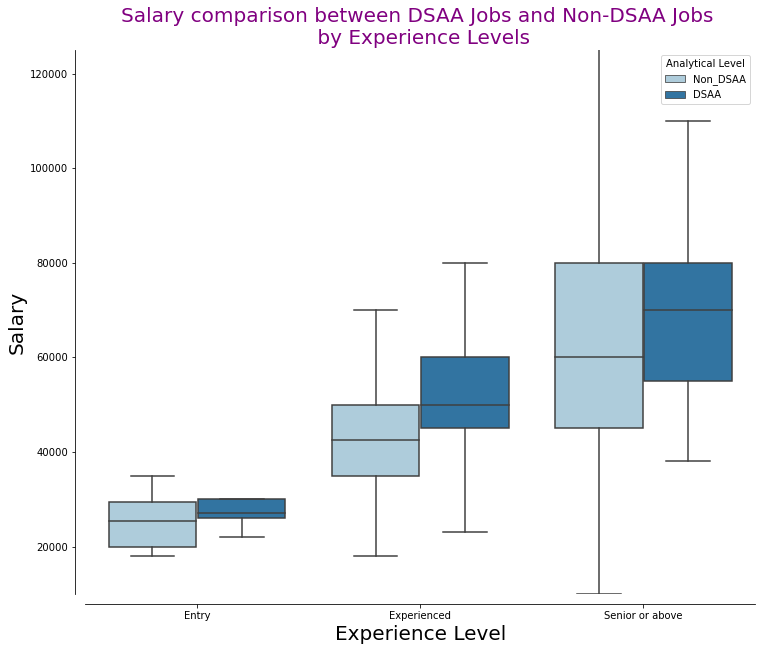

In [453]:
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.boxplot(
    x='Experience Level',
    y='salary',
    hue='Analytical Level',
    data=UKjobs,
    fliersize=0,
    palette='Paired',order=['Entry','Experienced','Senior or above'], 
    ax=ax)

ax.set_ylim([10000, 125000])
ax.set_ylabel("Salary", fontsize=20)
ax.set_xlabel("Experience Level", fontsize=20)
ax.set_title("Salary comparison between DSAA Jobs and Non-DSAA Jobs \n by Experience Levels", fontsize=20, color='Purple')

sns.despine(offset=10)
plt.savefig('Figure/Salary comparison between DSAA Jobs and Non-DSAA Jobs \n by Experience Levels.jpg')
plt.show()

## 2. Location

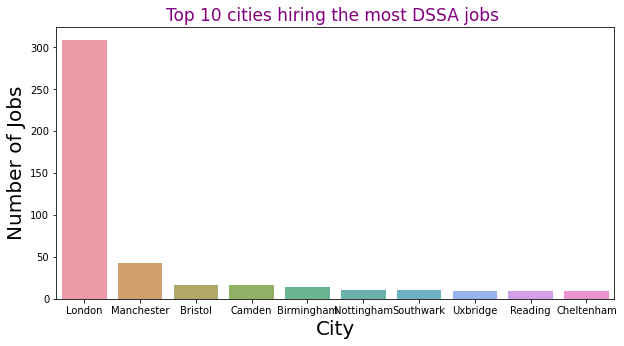

In [452]:
city_count  = UKjobs['city'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8,palette='husl')
plt.title('Top 10 cities hiring the most DSSA jobs ', fontsize=17, color='Purple')
plt.ylabel('Number of Jobs', fontsize=20)
plt.xlabel('City', fontsize=20)
plt.savefig('Figure/Top 10 cities hiring the most DSSA jobs.jpg')
plt.show()

In [27]:
number=UKjobs.city.value_counts(normalize=False)[:10]
number

London        309
Manchester     43
Bristol        17
Camden         16
Birmingham     14
Nottingham     11
Southwark      11
Uxbridge        9
Reading         9
Cheltenham      9
Name: city, dtype: int64

In [28]:
percent=UKjobs.city.value_counts(normalize=True)[:10]
percent

London        0.519328
Manchester    0.072269
Bristol       0.028571
Camden        0.026891
Birmingham    0.023529
Nottingham    0.018487
Southwark     0.018487
Uxbridge      0.015126
Reading       0.015126
Cheltenham    0.015126
Name: city, dtype: float64

In [49]:
UKjobs.groupby(['Capital','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Capital    Analytical Level                                               
London     DSAA              185.0  65202.972973  20080.731201  22000.0   
           Non_DSAA          124.0  62629.032258  28190.832778  18000.0   
Non-London DSAA              140.0  52508.171429  14747.770291  25000.0   
           Non_DSAA          146.0  46902.609589  17392.900947  10000.0   

                                 25%      50%      75%       max  
Capital    Analytical Level                                       
London     DSAA              50000.0  60000.0  75000.0  150000.0  
           Non_DSAA          45000.0  55000.0  80000.0  150000.0  
Non-London DSAA              40000.0  50000.0  60000.0   95000.0  
           Non_DSAA          35000.0  45000.0  55000.0  100000.0

In [30]:
#add a new column for Capital
UKjobs['Capital']=UKjobs['city']=='London'
#convert a boolean to a string
mask = UKjobs.applymap(type) != bool
d = {True: 'London', False: 'Non-London'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

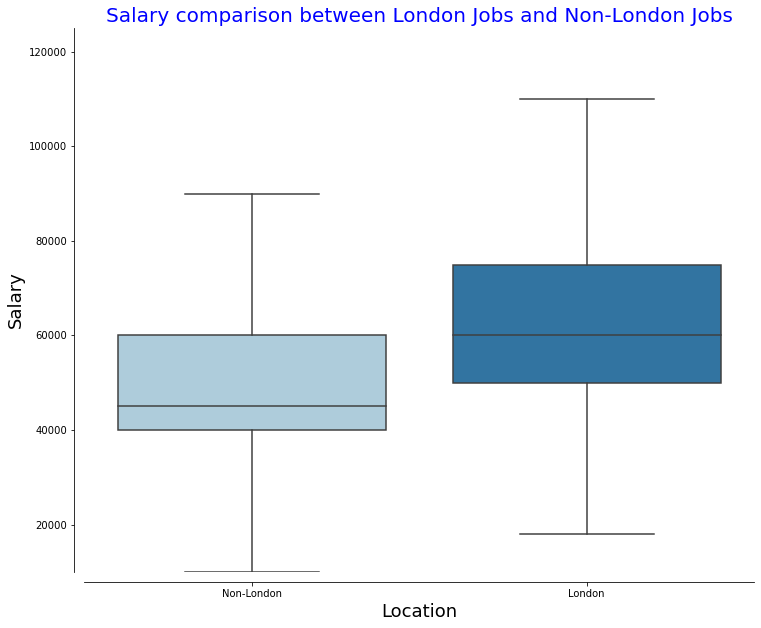

In [430]:
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.boxplot(
    x='Capital',
    y='salary',
    data=UKjobs,
    fliersize=0,
    palette='Paired', 
    ax=ax)

ax.set_ylim([10000, 125000])
ax.set_ylabel("Salary", fontsize=18)
ax.set_xlabel("Location", fontsize=18)
ax.set_title("Salary comparison between London Jobs and Non-London Jobs", fontsize=20, color='Blue')

sns.despine(offset=10)
plt.savefig('Figure/Salary comparison between London Jobs and Non-London Jobs.jpg')
plt.show()

In [77]:
UKjobs.groupby(['Capital','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Capital    Analytical Level                                               
London     DSAA              185.0  65202.972973  20080.731201  22000.0   
           Non_DSAA          124.0  62629.032258  28190.832778  18000.0   
Non-London DSAA              140.0  52508.171429  14747.770291  25000.0   
           Non_DSAA          146.0  46902.609589  17392.900947  10000.0   

                                 25%      50%      75%       max  
Capital    Analytical Level                                       
London     DSAA              50000.0  60000.0  75000.0  150000.0  
           Non_DSAA          45000.0  55000.0  80000.0  150000.0  
Non-London DSAA              40000.0  50000.0  60000.0   95000.0  
           Non_DSAA          35000.0  45000.0  55000.0  100000.0

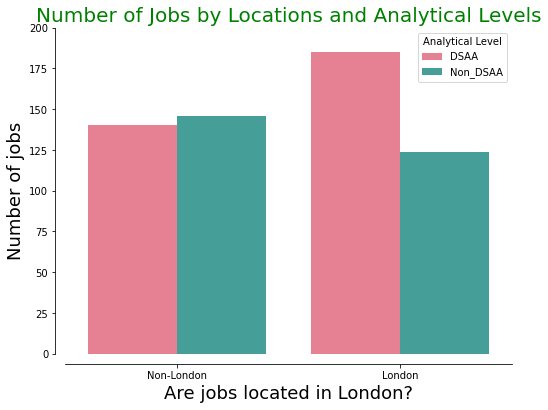

In [436]:
# plot number of jobs divided by Analytical Level 
fig, ax = plt.subplots(1, figsize=(8,6))
ax=sns.countplot(x="Capital",hue='Analytical Level', data=UKjobs,hue_order=['DSAA','Non_DSAA'],palette='husl')
ax.set_ylim([0, 200])
ax.set_ylabel("Number of jobs", fontsize=18)
ax.set_xlabel("Are jobs located in London?", fontsize=18)
ax.set_title("Number of Jobs by Locations and Analytical Levels", fontsize=20, color='Green')
sns.despine(offset=10)
plt.savefig('Figure/Number of Jobs by Locations and Analytical Levels.jpg')
plt.show()

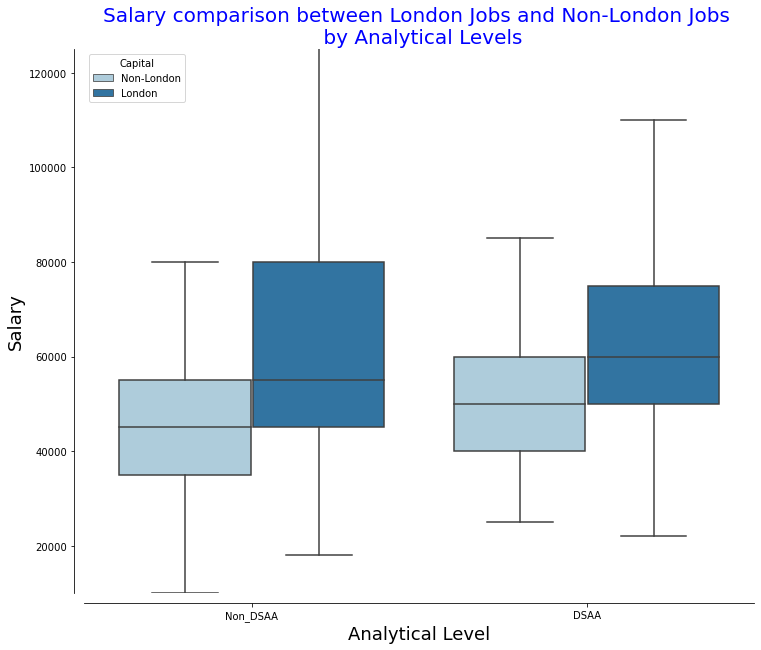

In [432]:
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.boxplot(
    x='Analytical Level',
    y='salary',
    hue='Capital',
    data=UKjobs,
    fliersize=0,
    palette='Paired',
    ax=ax)

ax.set_ylim([10000, 125000])
ax.set_ylabel("Salary", fontsize=18)
ax.set_xlabel("Analytical Level", fontsize=18)
ax.set_title("Salary comparison between London Jobs and Non-London Jobs \n by Analytical Levels", fontsize=20, color='Blue')

sns.despine(offset=10)
plt.savefig('Figure/Salary comparison between London Jobs and Non-London Jobs \n by Analytical Levels.jpg')
plt.show()

In [99]:
UKjobs.groupby(['Capital','Experience Level'])['salary'].describe()

count          mean           std      min  \
Capital    Experience Level                                               
London     Entry              10.0  28100.000000   6349.978128  18000.0   
           Experienced       134.0  56358.208955  19100.211779  20000.0   
           Senior or above   165.0  72700.303030  23472.919332  28000.0   
Non-London Entry               5.0  25200.000000   5805.170109  20000.0   
           Experienced       169.0  45489.674556  13247.859734  18000.0   
           Senior or above   112.0  57010.446429  17691.174913  10000.0   

                                 25%      50%      75%       max  
Capital    Experience Level                                       
London     Entry             24000.0  28000.0  30000.0   40000.0  
           Experienced       45000.0  55000.0  65000.0  125000.0  
           Senior or above   60000.0  70000.0  80000.0  150000.0  
Non-London Entry             20000.0  25000.0  27000.0   34000.0  
           Experienced       40000.0  45000.0  50000.0   95000.0  
           Senior or above   45000.0  55000.0  70000.0  100000.0

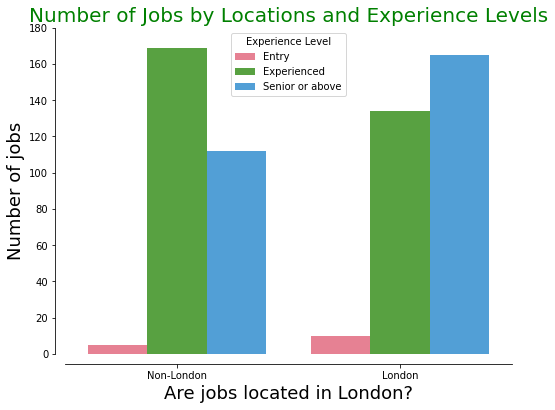

In [437]:
# plot number of jobs divided by Experience Level 
fig, ax = plt.subplots(1, figsize=(8,6))
ax=sns.countplot(x="Capital",hue='Experience Level', data=UKjobs,hue_order=['Entry','Experienced','Senior or above'],palette='husl')
ax.set_ylim([0, 180])
ax.set_ylabel("Number of jobs", fontsize=18)
ax.set_xlabel("Are jobs located in London?", fontsize=18)
ax.set_title("Number of Jobs by Locations and Experience Levels", fontsize=20, color='Green')
sns.despine(offset=10)
plt.savefig('Figure/Number of Jobs by Locations and Experience Levels.jpg')
plt.show()

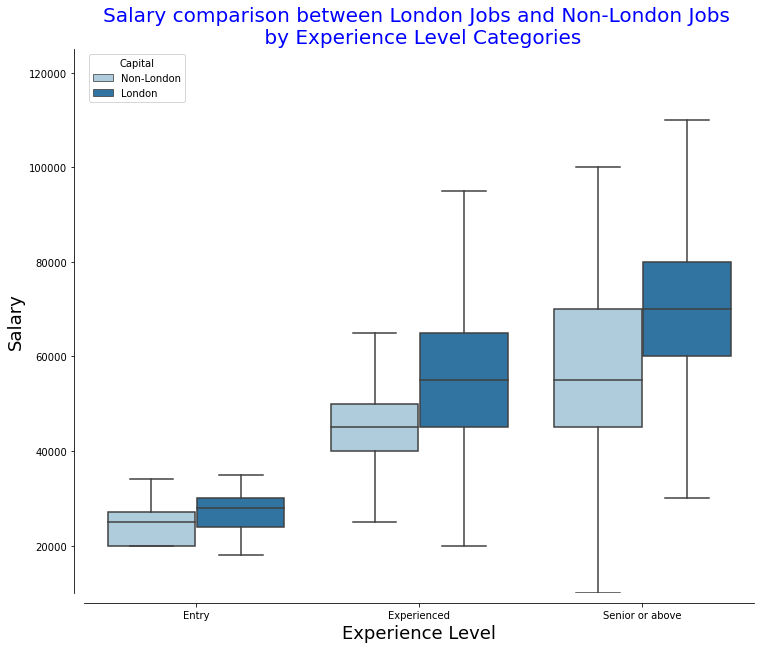

In [434]:
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.boxplot(
    x='Experience Level',
    y='salary',
    hue='Capital',
    data=UKjobs,
    fliersize=0,
     palette='Paired', order=['Entry','Experienced','Senior or above'],
    ax=ax)

ax.set_ylim([10000, 125000])
ax.set_ylabel("Salary", fontsize=18)
ax.set_xlabel("Experience Level", fontsize=18)
ax.set_title("Salary comparison between London Jobs and Non-London Jobs \n by Experience Level Categories", fontsize=20, color='Blue')

sns.despine(offset=10)
plt.savefig('Figure/Salary comparison between London Jobs and Non-London Jobs by Experience Levels.jpg')
plt.show()

## 3. Skills

### Python

In [220]:
Python='Python|python'

UKjobs['Python'] = UKjobs['description'].str.contains(Python)


mask = UKjobs.applymap(type) != bool
d = {True: 'Python', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Python','Analytical Level'])['salary'].describe()

count          mean           std      min      25%  \
Python Analytical Level                                                        
No     DSAA               83.0  60327.638554  21693.327431  23000.0  45000.0   
       Non_DSAA          132.0  53536.219697  25399.321400  18000.0  37250.0   
Python DSAA              242.0  59530.991736  18064.202877  22000.0  45000.0   
       Non_DSAA          138.0  54688.405797  23177.764554  10000.0  40000.0   

                             50%      75%       max  
Python Analytical Level                              
No     DSAA              60000.0  73775.0  150000.0  
       Non_DSAA          47500.0  61104.0  150000.0  
Python DSAA              60000.0  70000.0  125000.0  
       Non_DSAA          50000.0  65000.0  150000.0

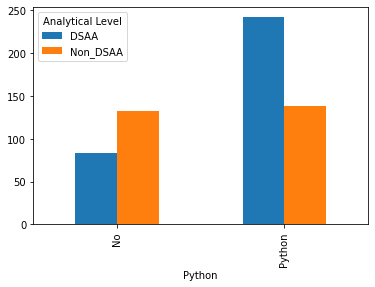

### R

In [223]:
R=' R | R+. |R+, |R-language|R-programming| R\/ |\/R|R+-|\-R'
UKjobs['R'] = UKjobs['description'].str.contains(R)

mask = UKjobs.applymap(type) != bool
d = {True: 'R', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['R','Analytical Level'])['salary'].describe()

count          mean           std      min      25%  \
R  Analytical Level                                                        
No DSAA              258.0  61551.139535  19409.010541  22000.0  48500.0   
   Non_DSAA          216.0  54224.148148  23570.541399  18000.0  40000.0   
R  DSAA               67.0  52738.805970  15727.643635  25000.0  40000.0   
   Non_DSAA           54.0  53728.981481  27036.096371  10000.0  40000.0   

                         50%      75%       max  
R  Analytical Level                              
No DSAA              60000.0  75000.0  150000.0  
   Non_DSAA          50000.0  65000.0  150000.0  
R  DSAA              50000.0  60000.0   90000.0  
   Non_DSAA          45000.0  60000.0  150000.0

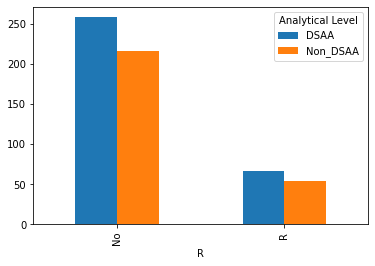

In [258]:
UKjobs.groupby('Analytical Level')['R'].value_counts().unstack(0).plot.bar()

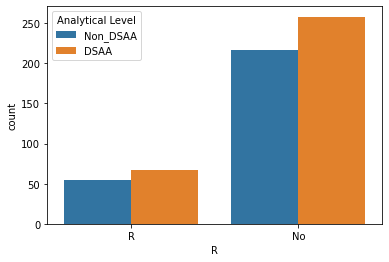

In [255]:
sns.countplot(x="R",hue='Analytical Level', data=UKjobs)


### SQL

In [225]:
SQL='SQL|sql|PostgreSQL|postgreSQL|MySQL|MSSQL|SQLite'
UKjobs['SQL'] = UKjobs['description'].str.contains(SQL)

mask = UKjobs.applymap(type) != bool
d = {True: 'SQL', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['SQL','Analytical Level'])['salary'].describe()


count          mean           std      min      25%  \
SQL Analytical Level                                                        
No  DSAA              138.0  63425.318841  19627.790043  25000.0  50000.0   
    Non_DSAA          147.0  56601.469388  25665.878625  18000.0  40000.0   
SQL DSAA              187.0  57010.695187  18142.799545  22000.0  45000.0   
    Non_DSAA          123.0  51165.569106  22184.797891  10000.0  40000.0   

                          50%      75%       max  
SQL Analytical Level                              
No  DSAA              60000.0  75000.0  150000.0  
    Non_DSAA          50000.0  70000.0  150000.0  
SQL DSAA              55000.0  70000.0  125000.0  
    Non_DSAA          45000.0  60000.0  150000.0

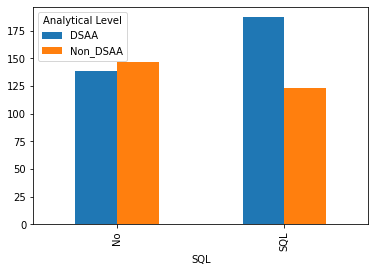

In [226]:
UKjobs.groupby('Analytical Level')['SQL'].value_counts().unstack(0).plot.bar()

### Data Science

In [227]:
Data_Science='Data Science|data science|Data science|data science'
UKjobs['Data_Science'] = UKjobs['description'].str.contains(Data_Science)

mask = UKjobs.applymap(type) != bool
d = {True: 'Data_Science', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Data_Science','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Data_Science Analytical Level                                               
Data_Science DSAA              224.0  59367.812500  20177.503571  22000.0   
             Non_DSAA          224.0  54266.879464  25589.978591  10000.0   
No           DSAA              101.0  60547.564356  16242.916153  30000.0   
             Non_DSAA           46.0  53434.782609  16425.795667  25000.0   

                                   25%      50%      75%       max  
Data_Science Analytical Level                                       
Data_Science DSAA              45000.0  60000.0  70000.0  150000.0  
             Non_DSAA          40000.0  49000.0  65000.0  150000.0  
No           DSAA              50000.0  60000.0  70000.0  110000.0  
             Non_DSAA          45000.0  50000.0  60000.0  100000.0

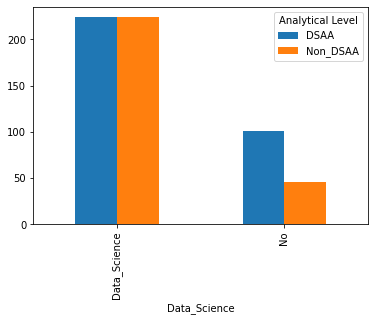

In [229]:
UKjobs.groupby('Analytical Level')['Data_Science'].value_counts().unstack(0).plot.bar()

### Machine Learning

In [230]:
Machine_Learning='Machine learning|machine learning|Machine Learning'
UKjobs['Machine_Learning'] = UKjobs['description'].str.contains(Machine_Learning)

mask = UKjobs.applymap(type) != bool
d = {True: 'Machine_Learning', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Machine_Learning','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Machine_Learning Analytical Level                                               
Machine_Learning DSAA              147.0  59702.408163  18212.077143  25000.0   
                 Non_DSAA           77.0  61844.155844  29508.725264  25000.0   
No               DSAA              178.0  59760.898876  19721.931131  22000.0   
                 Non_DSAA          193.0  51045.497409  21115.027573  10000.0   

                                       25%      50%      75%       max  
Machine_Learning Analytical Level                                       
Machine_Learning DSAA              50000.0  60000.0  70000.0  125000.0  
                 Non_DSAA          40000.0  56000.0  75000.0  150000.0  
No               DSAA              45000.0  60000.0  74387.5  150000.0  
                 Non_DSAA          40000.0  50000.0  60000.0  150000.0

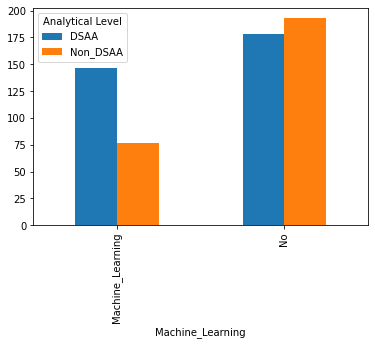

In [181]:
UKjobs.groupby('Analytical Level')['Machine_Learning'].value_counts().unstack(0).plot.bar()

### Visualization

In [231]:
Visualization='Power BI|power bi|Tableau|Visualisation|data viz|visualisation|visualization|Visualization|visuals|plotly|seaborn|matplotlib|Seaborn|Matplotlib|Visuals'
UKjobs['Visualization'] = UKjobs['description'].str.contains(Visualization)

mask = UKjobs.applymap(type) != bool
d = {True: 'Visualization', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Visualization','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Visualization Analytical Level                                               
No            DSAA              277.0  61005.198556  18941.198782  22000.0   
              Non_DSAA          211.0  56660.739336  26049.560038  10000.0   
Visualization DSAA               48.0  52401.125000  17996.219021  25000.0   
              Non_DSAA           59.0  45057.033898  12790.568526  22000.0   

                                    25%      50%      75%       max  
Visualization Analytical Level                                       
No            DSAA              45000.0  60000.0  70000.0  150000.0  
              Non_DSAA          40000.0  50000.0  70000.0  150000.0  
Visualization DSAA              41500.0  50000.0  66250.0  100000.0  
              Non_DSAA          35000.0  45000.0  55000.0   80000.0

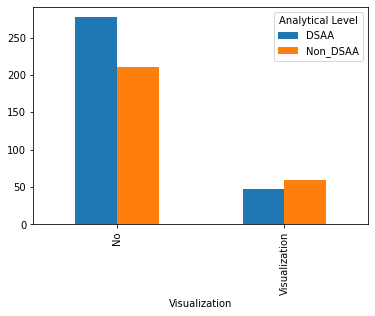

In [232]:
UKjobs.groupby('Analytical Level')['Visualization'].value_counts().unstack(0).plot.bar()

### Research

In [233]:
Research='Research|research'
UKjobs['Research'] = UKjobs['description'].str.contains(Research)

mask = UKjobs.applymap(type) != bool
d = {True: 'Research', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Research','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Research Analytical Level                                               
No       DSAA              276.0  60671.884058  18966.625273  22000.0   
         Non_DSAA          239.0  53788.138075  24521.780372  10000.0   
Research DSAA               49.0  54454.163265  18672.173797  25000.0   
         Non_DSAA           31.0  56723.096774  22247.561753  18000.0   

                               25%      50%      75%       max  
Research Analytical Level                                       
No       DSAA              45000.0  60000.0  70000.0  150000.0  
         Non_DSAA          40000.0  50000.0  60000.0  150000.0  
Research DSAA              40000.0  50000.0  70000.0  110000.0  
         Non_DSAA          40000.0  60000.0  75000.0  100000.0

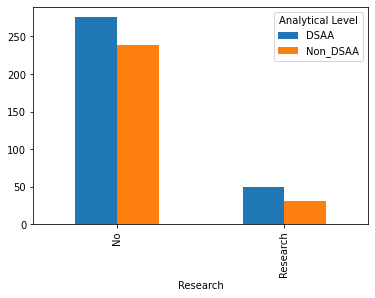

In [234]:
UKjobs.groupby('Analytical Level')['Research'].value_counts().unstack(0).plot.bar()

### Hadoop

In [235]:
Hadoop='Hadoop|Apache Hadoop|hadoop'
UKjobs['Hadoop'] = UKjobs['description'].str.contains(Hadoop)

mask = UKjobs.applymap(type) != bool
d = {True: 'Hadoop', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Hadoop','Analytical Level'])['salary'].describe()

count          mean           std      min      25%  \
Hadoop Analytical Level                                                        
Hadoop DSAA               29.0  64137.931034  16260.653953  30000.0  55000.0   
       Non_DSAA            2.0  80000.000000  21213.203436  65000.0  72500.0   
No     DSAA              296.0  59303.020270  19244.158789  22000.0  45000.0   
       Non_DSAA          268.0  53932.018657  24202.609025  10000.0  40000.0   

                             50%      75%       max  
Hadoop Analytical Level                              
Hadoop DSAA              60000.0  70000.0   95000.0  
       Non_DSAA          80000.0  87500.0   95000.0  
No     DSAA              60000.0  70000.0  150000.0  
       Non_DSAA          50000.0  64562.0  150000.0

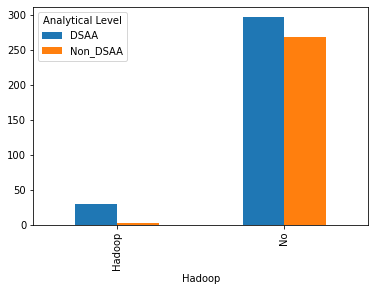

In [236]:
UKjobs.groupby('Analytical Level')['Hadoop'].value_counts().unstack(0).plot.bar()

### Communication

In [237]:
Communication='Communication Skills|Communication|Communication skills| communication skills'
UKjobs['Communication'] = UKjobs['description'].str.contains(Communication)

mask = UKjobs.applymap(type) != bool
d = {True: 'Communication', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Communication','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Communication Analytical Level                                               
Communication DSAA               41.0  54024.390244  15460.413650  25000.0   
              Non_DSAA           50.0  44927.300000  18507.389016  18000.0   
No            DSAA              284.0  60558.781690  19369.908707  22000.0   
              Non_DSAA          220.0  56215.527273  24940.441349  10000.0   

                                    25%      50%      75%       max  
Communication Analytical Level                                       
Communication DSAA              40000.0  50000.0  60000.0   90000.0  
              Non_DSAA          35000.0  40000.0  50000.0  100000.0  
No            DSAA              45000.0  60000.0  70000.0  150000.0  
              Non_DSAA          40000.0  50000.0  70000.0  150000.0

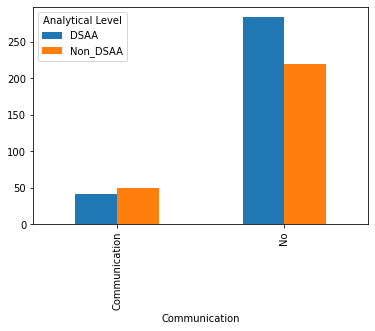

In [238]:
UKjobs.groupby('Analytical Level')['Communication'].value_counts().unstack(0).plot.bar()

### JavaScript

In [239]:

Java='Java|java|JavaScript|javascript'
UKjobs['Java'] = UKjobs['description'].str.contains(Java)

mask = UKjobs.applymap(type) != bool
d = {True: 'Java', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Java','Analytical Level'])['salary'].describe()

count          mean           std      min      25%  \
Java Analytical Level                                                        
Java DSAA               49.0  60020.408163  18246.563370  23000.0  50000.0   
     Non_DSAA           40.0  51925.000000  22112.054376  18000.0  35000.0   
No   DSAA              276.0  59683.673913  19191.359794  22000.0  45000.0   
     Non_DSAA          230.0  54507.743478  24628.465574  10000.0  40000.0   

                           50%      75%       max  
Java Analytical Level                              
Java DSAA              60000.0  75000.0  110000.0  
     Non_DSAA          47500.0  66250.0  100000.0  
No   DSAA              60000.0  70000.0  150000.0  
     Non_DSAA          50000.0  60000.0  150000.0

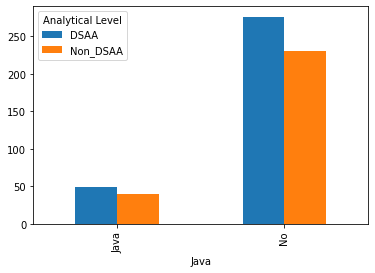

In [240]:
UKjobs.groupby('Analytical Level')['Java'].value_counts().unstack(0).plot.bar()

### Scala

In [241]:
Scala='Scala|scala'
UKjobs['Scala'] = UKjobs['description'].str.contains(Scala)

mask = UKjobs.applymap(type) != bool
d = {True: 'Scala', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Scala','Analytical Level'])['salary'].describe()

count          mean           std      min      25%  \
Scala Analytical Level                                                        
No    DSAA              254.0  57694.448819  17701.714737  22000.0  45000.0   
      Non_DSAA          248.0  53083.794355  24243.172331  10000.0  40000.0   
Scala DSAA               71.0  67032.450704  21763.069718  30000.0  50000.0   
      Non_DSAA           22.0  65863.636364  21523.620368  45000.0  50000.0   

                            50%      75%       max  
Scala Analytical Level                              
No    DSAA              60000.0  70000.0  120000.0  
      Non_DSAA          45000.0  60000.0  150000.0  
Scala DSAA              65000.0  75000.0  150000.0  
      Non_DSAA          60000.0  70000.0  130000.0

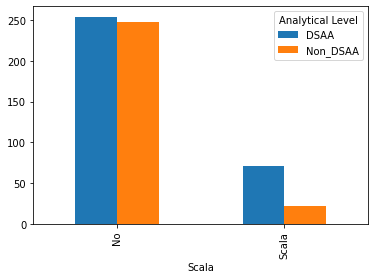

In [242]:
UKjobs.groupby('Analytical Level')['Scala'].value_counts().unstack(0).plot.bar()

### Big Data

In [243]:
Big_Data='\S*Big Data|big data |big Data|Big data+\S*'
UKjobs['Big_Data'] = UKjobs['description'].str.contains(Big_Data)

mask = UKjobs.applymap(type) != bool
d = {True: 'Big_Data', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Big_Data','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Big_Data Analytical Level                                               
Big_Data DSAA               59.0  68589.050847  20784.392620  25000.0   
         Non_DSAA           19.0  48578.947368  18530.202941  25000.0   
No       DSAA              266.0  57770.451128  18073.552902  22000.0   
         Non_DSAA          251.0  54544.944223  24608.071705  10000.0   

                               25%      50%      75%       max  
Big_Data Analytical Level                                       
Big_Data DSAA              57500.0  65000.0  80000.0  125000.0  
         Non_DSAA          39000.0  45000.0  62500.0   95000.0  
No       DSAA              45000.0  55000.0  70000.0  150000.0  
         Non_DSAA          40000.0  50000.0  65000.0  150000.0

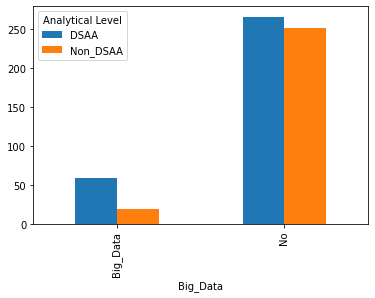

In [244]:
UKjobs.groupby('Analytical Level')['Big_Data'].value_counts().unstack(0).plot.bar()

### The popularity of top 10 skills 

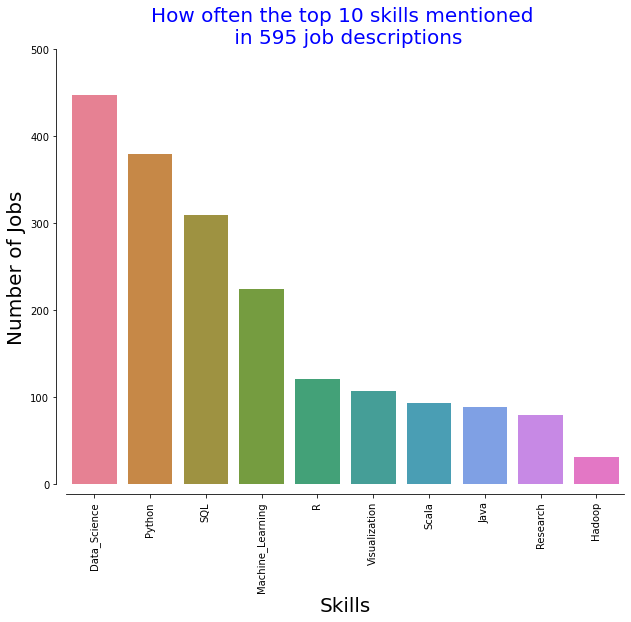

In [465]:
df = pd.melt(UKjobs[['Scala','Python','Data_Science','Machine_Learning','SQL','Hadoop','Visualization','Research','Java','R']])
df2=df.loc[df['value']!="No"]

fig, ax = plt.subplots(1, figsize=(10,8))
ax=sns.countplot(data=df2, x='variable',order = df2['variable'].value_counts().index,palette='husl')

ax.set_ylim([0, 500])
ax.set_ylabel("Number of Jobs", fontsize=20)
ax.set_xlabel("Skills", fontsize=20)
ax.set_title("How often the top 10 skills mentioned \n in 595 job descriptions", fontsize=20, color='Blue')

sns.despine(offset=10)
plt.xticks(rotation=90)
plt.savefig('Figure/Skill.jpg')

In [471]:
skill=df2['variable'].value_counts()
skill

Data_Science        448
Python              380
SQL                 310
Machine_Learning    224
R                   121
Visualization       107
Scala                93
Java                 89
Research             80
Hadoop               31
Name: variable, dtype: int64

In [472]:
skill_percentage=skill.multiply(other = 100/595)
skill_percentage

Data_Science        75.294118
Python              63.865546
SQL                 52.100840
Machine_Learning    37.647059
R                   20.336134
Visualization       17.983193
Scala               15.630252
Java                14.957983
Research            13.445378
Big_Data            13.109244
Hadoop               5.210084
dtype: float64

### The popularity of top 10 skills segmented by Analytical Level

In [466]:
df = pd.melt(UKjobs[['Scala','Python','Data_Science','Machine_Learning','SQL','Hadoop','Visualization','Research','Java','Analytical Level','R']],id_vars='Analytical Level')
df2=df.loc[df['value']!="No"]
df2.head()


,Analytical Level,variable,value
53,DSAA,Scala,Scala
92,DSAA,Scala,Scala
106,DSAA,Scala,Scala
133,DSAA,Scala,Scala
134,DSAA,Scala,Scala


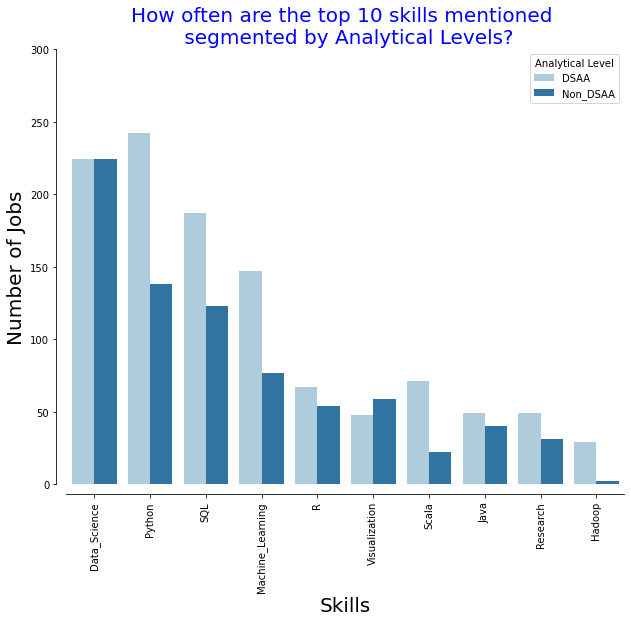

In [468]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax=sns.countplot(data=df2, x='variable',hue='Analytical Level',order = df2['variable'].value_counts().index,palette='Paired')

ax.set_ylim([0, 300])
ax.set_ylabel("Number of Jobs", fontsize=20)
ax.set_xlabel("Skills", fontsize=20)
ax.set_title("How often are the top 10 skills mentioned \n segmented by Analytical Levels?", fontsize=20, color='Blue')

sns.despine(offset=10)
plt.xticks(rotation=90)
plt.savefig('Figure/Skill_Analytical_Level.jpg')
plt.show()

In [365]:
df2.groupby('Analytical Level')['variable'].value_counts()

Analytical Level  variable        
DSAA              Python              242
                  Data_Science        224
                  SQL                 187
                  Machine_Learning    147
                  Scala                71
                  Java                 49
                  Research             49
                  Visualization        48
                  Hadoop               29
Non_DSAA          Data_Science        224
                  Python              138
                  SQL                 123
                  Machine_Learning     77
                  Visualization        59
                  Java                 40
                  Research             31
                  Scala                22
                  Hadoop                2
Name: variable, dtype: int64